In [1]:
# This script is for RF, all variables
# Take Dataset3 LA for example

In [2]:
# Packages
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import statsmodels.api as sm
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
X_complete_test_passed = pd.read_csv("../Data/01 Processed Dataset/Complete_LA.csv") #input
X_complete_test_passed1 = X_complete_test_passed.set_index('GEOID')
y = X_complete_test_passed1.pop('obesity_cr')

In [4]:
X_complete_test_passed1.head()

,% Black,% Ame Indi and AK Native,% Asian,% Nati Hawa and Paci Island,% Hispanic or Latino,% male,% married,% age 18-29,% age 30-39,% age 40-49,...,% unemployment,% below poverty line,% food stamp/SNAP,median value units built,median year units built,% renter-occupied housing units,population density,fafood,fitness,park
GEOID,,,,,,,,,,,,,,,,,,,,,
6037137504,0.009165,0.013025,0.015919,0.000000,0.030873,0.502653,0.550339,0.104197,0.093102,0.112880,...,0.027916,0.043415,0.010086,1185500,1968,0.025937,540.339075,0.808312,0.924512,0.798134
6037138000,0.071474,0.002354,0.071260,0.000000,0.084100,0.514659,0.604255,0.084314,0.126471,0.148727,...,0.073945,0.082602,0.003363,832900,1966,0.172646,1045.182340,0.626115,0.869126,0.754610
6037139200,0.026199,0.000000,0.143836,0.000000,0.227740,0.440925,0.406014,0.153767,0.171062,0.112158,...,0.080120,0.103082,0.028545,560600,1971,0.429098,5070.897045,0.697122,0.827326,0.570550
6037143200,0.091449,0.000000,0.061758,0.006888,0.128029,0.444893,0.334596,0.194299,0.259145,0.160095,...,0.096330,0.108076,0.053769,693300,1977,0.712914,4400.511337,0.474305,0.630256,0.466741
6037143300,0.070877,0.003863,0.072214,0.000000,0.188707,0.484695,0.436177,0.154532,0.158544,0.207875,...,0.059385,0.057219,0.015098,810100,1968,0.595567,4068.456711,0.607633,0.982546,0.762392


In [5]:
y.head()

GEOID
6037137504    22.0
6037138000    23.4
6037139200    24.7
6037143200    23.5
6037143300    23.1
Name: obesity_cr, dtype: float64

In [6]:
def standarize_data(data, stats):
    return (data - stats['mean'])/ stats['std']

In [7]:
# feature importance table
df_complete_feaimp = pd.DataFrame({'feature':X_complete_test_passed1.columns}).set_index('feature')

In [8]:
y_rf_complete_predict = []
y_true = []

ten_fold = KFold(n_splits=10, shuffle=True, random_state=42)

fold_index = 0

avg_r_squared = 0

for train_index, test_index in ten_fold.split(X_complete_test_passed1):
    print("TEST:", test_index)
    fold_index += 1

    X_train, X_test = X_complete_test_passed1.iloc[train_index], X_complete_test_passed1.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    training_stat = X_train.describe().transpose()
    scaled_X_train = standarize_data(X_train, training_stat)
    scaled_X_test = standarize_data(X_test, training_stat)

    rf = RandomForestRegressor(bootstrap=False, n_estimators=890, max_features=10, random_state=42) # input
    rf.fit(scaled_X_train, y_train)
    
    ## record feature importance
    df_complete_feaimp['fold_'+str(fold_index)] = rf.feature_importances_
    ## finish recording feature importance

    this_y_predict = rf.predict(scaled_X_test).flatten()

    y_rf_complete_predict = y_rf_complete_predict + this_y_predict.tolist()
    y_true = y_true + y_test.tolist()
    
    avg_r_squared += r2_score(y_test, this_y_predict)

TEST: [ 23  30  39  44  59  63  67  70  72  76  86  88  96 107 120 136 139 165
 168 198 208 209 215 218 247 250 259 260 265 275 280 292 294 298 310 312
 327 331 332 333 363 365 377 388 394 439 449 453 457 464 465 478 481 495
 500 513 518 519 527 541 554 559 569 589 591 599 616 617 643 644 653 658
 673 679 684 695 708 753 762 767 777 778 783 792 804 816 826 850 858 874
 883 908 926 932 942]
TEST: [ 31  33  49  60  65  66  78 110 137 141 158 174 192 199 210 213 231 235
 254 261 266 286 296 302 306 307 309 311 314 316 326 328 334 342 352 361
 371 381 405 423 428 430 433 442 447 482 483 493 507 525 531 543 545 570
 572 576 594 602 605 606 615 625 630 685 689 694 707 732 735 736 737 746
 780 784 788 813 814 817 819 820 835 838 852 854 866 872 886 889 896 904
 910 925 941 944 945]
TEST: [  2   5   7  10  25  29  54  55  77  81  82  84  97 101 109 118 155 196
 204 211 227 228 239 244 281 318 319 321 323 344 346 350 355 357 380 398
 408 411 412 420 424 425 444 451 456 468 494 514 516 526 529 5

In [9]:
rf_complete_rmse = mean_squared_error(y_true , y_rf_complete_predict, squared=False)
rf_complete_r2 = r2_score(y_true, y_rf_complete_predict)
avg_r_squared = avg_r_squared/10

In [10]:
print("RMSE of the RF model with sociodemographic + diet and physical avtivity visit predictors: "+str(rf_complete_rmse))
print("R2 of the RF model with sociodemographic + diet and physical avtivity visit predictors: "+str(rf_complete_r2)) # For R2, I took this one.
print("R2 of the RF model with sociodemographic + diet and physical avtivity visit predictors (avg): "+str(avg_r_squared))

RMSE of the RF model with sociodemographic + diet and physical avtivity visit predictors: 1.2095420179072158
R2 of the RF model with sociodemographic + diet and physical avtivity visit predictors: 0.9504848130255938
R2 of the RF model with sociodemographic + diet and physical avtivity visit predictors (avg): 0.9498886587104156


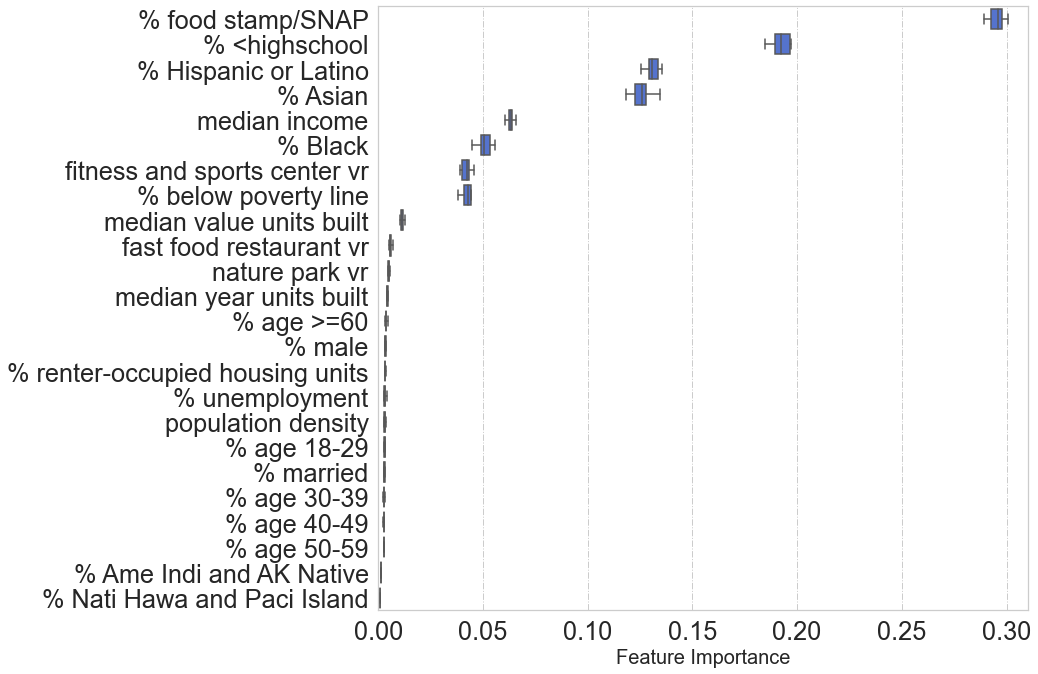

In [11]:
# Feature importance Sns visualization (boxplot, I will not use this one, I will use below one)
df_complete_feaimp = df_complete_feaimp.rename(index={'fitness':'fitness and sports center vr', 'park':'nature park vr', 'fafood':'fast food restaurant vr'}) 

font = {'family' : 'Arial',
        'weight' : 'normal',
        'size'   : 28}

matplotlib.rc('font', **font)

plt.figure(figsize=(15,10))
sns.set_theme(style="whitegrid",font_scale = 2.3)

df_complete_feaimp_box = df_complete_feaimp.T
index_sort = df_complete_feaimp_box.mean().sort_values(ascending=False).index
df_complete_feaimp_box = df_complete_feaimp_box[index_sort]

ax = sns.boxplot(data=df_complete_feaimp_box, orient='h', showfliers = False, color = "royalblue")
plt.xlabel('Feature Importance', fontsize=20)
plt.ylabel('')
plt.xlim(0,0.31)
plt.grid(axis = 'x', linestyle='-.')
plt.tight_layout()

# plt.savefig("../boxplot_featureimportance_LA.png",dpi=300) # input

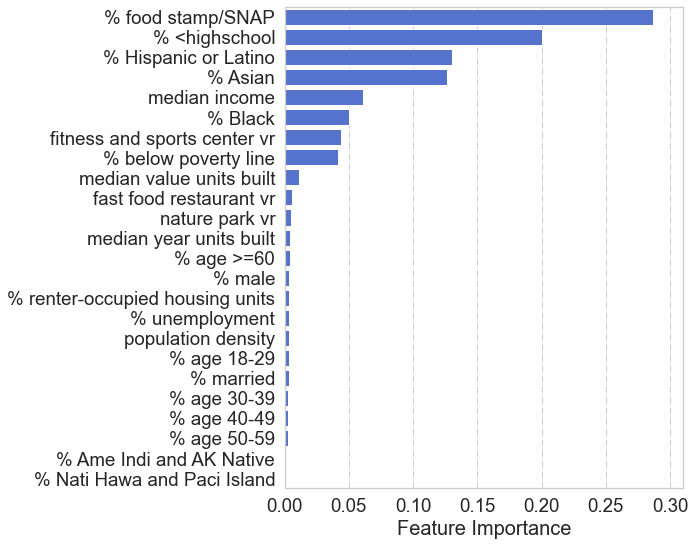

In [14]:
# Feature importance bar visualization (bar plot, this one I use)
df_complete_feaimp["mean"] = df_complete_feaimp.mean(axis = 1)
df_complete_feaimp1 = df_complete_feaimp.reset_index()
df_complete_feaimp2 = df_complete_feaimp1.sort_values(by = "mean", ascending = False)

font = {'family' : 'Arial',
        'weight' : 'normal',
        'size'   : 28}

matplotlib.rc('font', **font)

plt.figure(figsize=(10,8))
sns.set_theme(style="whitegrid",font_scale = 1.7)

ax = sns.barplot(y="feature", x="mean", data=df_complete_feaimp2, color = "royalblue")
plt.xlabel('Feature Importance', fontsize=20)
plt.ylabel('')
plt.xlim(0,0.31)
plt.grid(axis = 'x', linestyle='-.')
plt.tight_layout()
# plt.savefig("../02 Dataset/11 RF Important Figure/bar_feature_importance_LA.png",dpi=300)

17.0
41.6
19.0640449438203
39.47292134831455


<Figure size 720x576 with 0 Axes>

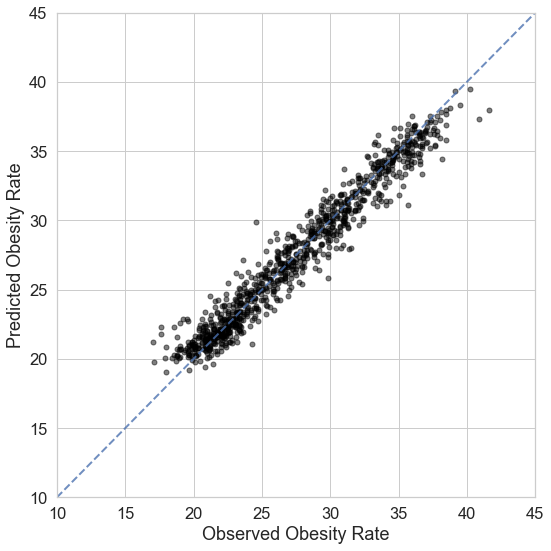

In [13]:
# Scatter-curve plot
font = {'family' : 'Arial',
        'weight' : 'normal',
        'size'   : 28}

matplotlib.rc('font', **font)

plt.figure(figsize=(10,8))
sns.set_theme(style="whitegrid",font_scale = 1.5)

def prediction_scatter(true_label, prediction, lims, title):
    plt.figure(figsize=(8,8))
    scatter = plt.plot(true_label, prediction, "o", markersize=5, alpha=0.5, color="black")
    line = plt.plot(lims, lims, "b--",alpha=0.8, linewidth=2)
    plt.xlim(lims)
    plt.ylim(lims)
    plt.xlabel('Observed Obesity Rate')
    plt.ylabel('Predicted Obesity Rate')
    plt.title(title)
    
print(np.min(y_true))
print(np.max(y_true))
print(np.min(y_rf_complete_predict))
print(np.max(y_rf_complete_predict))

#scatter plot
lims = [10, 45]
prediction_scatter(y_true, y_rf_complete_predict, lims, "")
plt.tight_layout()
# plt.savefig("../RF_pred_origin_LA.png",dpi=300)